## **TITANIC SURVIVOR ANALYSIS**










In [293]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

Reading data:

we use the read_csv function to read to excel file and pandas DataFrame method to convert the file into a data frame.
10 records of the csv file is read using the head method

In [294]:
df= pd.DataFrame(pd.read_csv('/content/train (1).csv'))
df.head(10)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


analysis on how many null values are there in each column is checked from the following code:

In [295]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

as you can see, cabin column has a lot of missing values(687) and also age column has 177 missing values . embarked has only 2 missing values.
 
 
 now we have to check whether which column has missing values more than 20%.

In [296]:
y=df.isnull().sum()
col=y[y>(20/100*df.shape[0])]
col

Cabin    687
dtype: int64

 we can see that cabin has missing values more than 20%, we should delete the cabin column by assuming it to be unrealated

In [ ]:
col.index

Index(['Cabin'], dtype='object')

In [297]:
df.drop(col.index, axis=1, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

now , the age column contains 177 null values, but since age is essential and it cannot be droped, we have to fill it with zeros.

In [298]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


as you can see below there are more males than the females

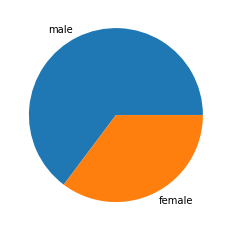

In [299]:
sorted_counts = df['Sex'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index);

if we check the survival rate of males and females:


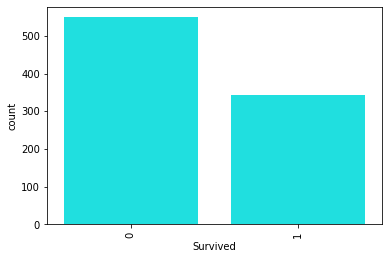

In [306]:
base_color = sb.color_palette()[2]
sb.countplot(data = df, x = 'Survived', color = 'cyan'                                                  )
plt.xticks(rotation=90);

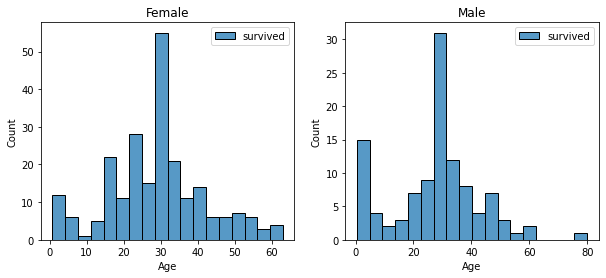

In [305]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = df[df['Sex']=='female']
male = df[df['Sex']=='male']
ax = sb.histplot(female[female['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)

ax.legend()
ax.set_title('Female')
ax = sb.histplot(male[male['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)

ax.legend()
_ = ax.set_title('Male')

You can see that men have a high probability of survival when they are between 18 and 30 years old. For women the survival chances are higher between 14 and 40.

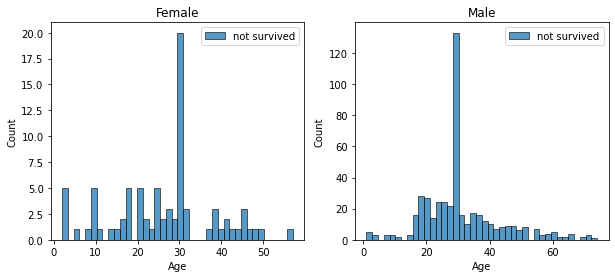

In [304]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']

ax = sb.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sb.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

For men the probability of survival is very low between the age of 5 and 18. but women has more survival capacity Another thing to note is that infants also have a little bit higher probability of survival.

In [ ]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

as you can see above, embarked has 889 non-null values where as it there are 2 null values. an the unique means number of unique values(s,c,q). top means the element with highest frequency. (s has the highest frequency). freq shows number of 's' inside the embarked column.(number of occurences of the top)

In [ ]:
data=[df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
relatives      0
alone          0
dtype: int64

eembarked is filled with the common value 's' therefore there are no null values remaining

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


df.corr() show the correlation between diffrent columns.

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives. so inorder to find the family size we have to add sibsp and prach together and find the number of people not having  a family(alone)

In [ ]:
df['relatives'] = df['SibSp'] + df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,relatives
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
relatives,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


as you can see now there is no much correlation with survival rate

now lets see whether a person being alone can affect the survival rate

In [ ]:
df["alone"]=[0 if df['relatives'][i]>0 else 1 for i in df.index]
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,relatives,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,C,1,0


when the relatives are 1 which means not alone the alone column gets value 0. when family is 0 then alone gets 1 which means hes alone

In [ ]:
df.groupby(['alone'])['Survived'].mean()

alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

as you can see if the person is alone he has a less chance of surviving.

In [ ]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

as you can see 'c' has higher value of survival compared to  Q and S. 

In [ ]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

as you can see if the person is a female she has a higher rate of survival than male. so the sex has affected the survival

***now lets see whether the pclass affects the survival ***

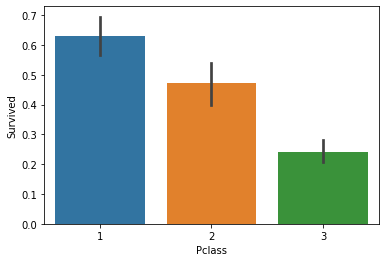

In [ ]:
sb.barplot(x='Pclass', y='Survived', data=df)

we can see from the above graph that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. 

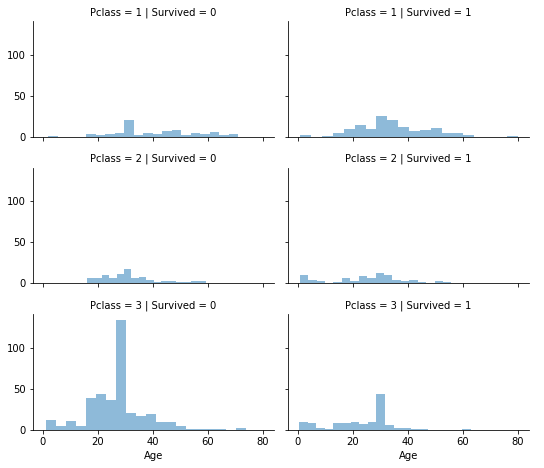

In [307]:
grid = sb.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.7)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms our assumption about pclass 1, but we can also spot a high possibility that a person in pclass 3 will not survive.

# **conclusions**:

1) men have a high probability of survival when they are between 18 and 30 years old. and  women had a higher survival when they are between 14 and 40.

2)had a lower chance of survival if a passenger was alone and didnt have a family

3)passengers who boarded from cherbourg has more survival than others

4)passengers travelling with their relatives had high chance of survival

5)passengers with class 1 had higher survival than others

6)passengers with class 3 had higher chance of not surviving

7)female passengers had higher survival rate compared to men

8)there were more males in the ship than females

9)infants too has a little hight probability of survival

